# Heart Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\heart.csv")


# DATA ANALYSING

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# DATA CLEANING

Text(0.5, 1.0, 'oldpeak')

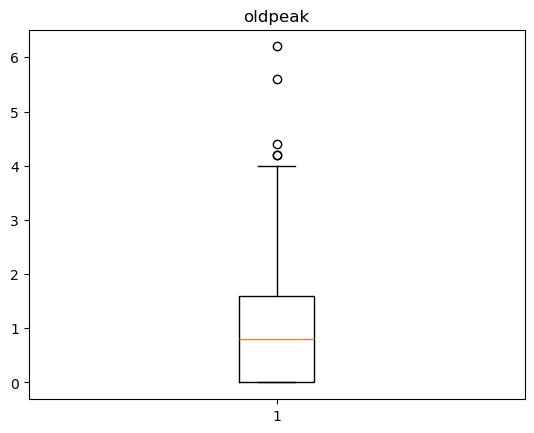

In [9]:
plt.boxplot(df['oldpeak'])
plt.title('oldpeak')

Text(0.5, 1.0, 'fbs')

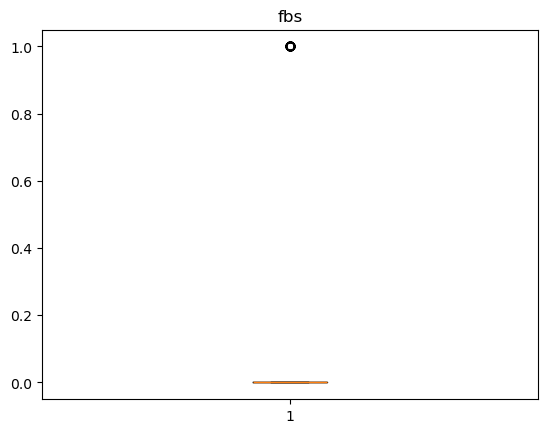

In [10]:
plt.boxplot(df['fbs'])
plt.title('fbs')

In [11]:
Q1=np.percentile(df['oldpeak'],25,interpolation='midpoint')
Q2=np.percentile(df['oldpeak'],50,interpolation='midpoint')
Q3=np.percentile(df['oldpeak'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.8
1.6


In [12]:
IQR=Q3-Q1
print(IQR)

1.6


In [13]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

4.0
-2.4000000000000004


In [14]:
outlier=[]
for x in df['oldpeak']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
outlier

[4.2, 6.2, 5.6, 4.2, 4.4]

# DATA TRANSFORMING

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# DATA SCALING

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
x = df.drop('target',axis=1)
y = df['target']

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
std=StandardScaler()

In [24]:
x=std.fit_transform(x)

In [25]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [26]:
a=pd.DataFrame(x,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [27]:
out=pd.concat([a,y],axis=1)

In [28]:
out

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


In [29]:
out.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16,0.544554
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00,0.000000
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01,0.000000
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01,1.000000
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00,1.000000
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00,1.000000


# DATA VISUALISATION

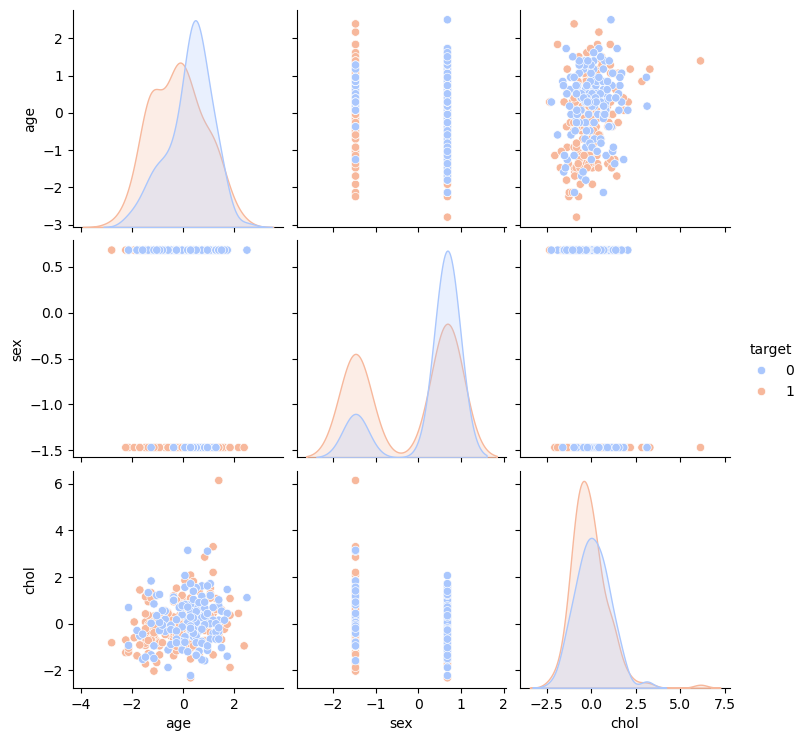

In [30]:
df_selected = out[['age','sex','chol','target']]

sns.pairplot(df_selected, hue='target', palette='coolwarm')

<Axes: xlabel='slope', ylabel='Density'>

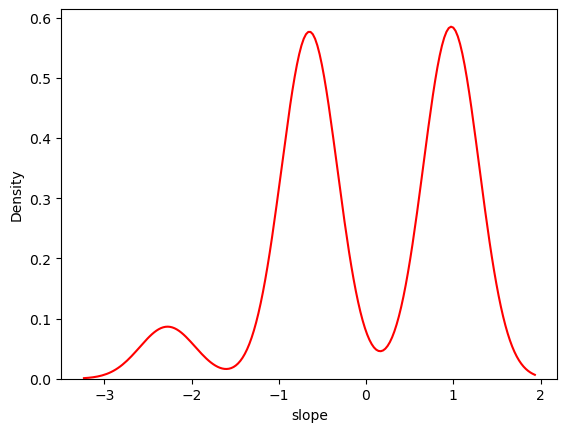

In [31]:
sns.kdeplot(out['slope'],color='r')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10576\264306448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out['trestbps'],kde=False,color='k')


<Axes: xlabel='trestbps'>

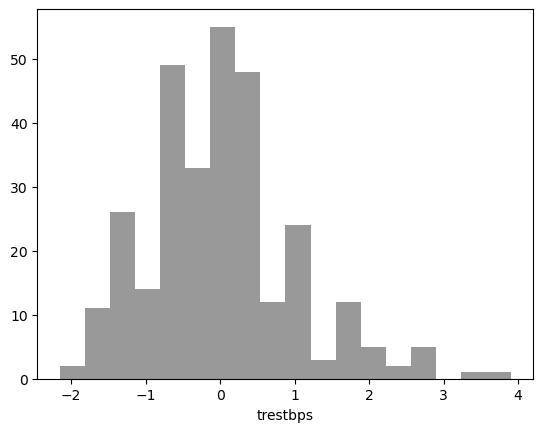

In [32]:
sns.distplot(out['trestbps'],kde=False,color='k')

In [33]:
out.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

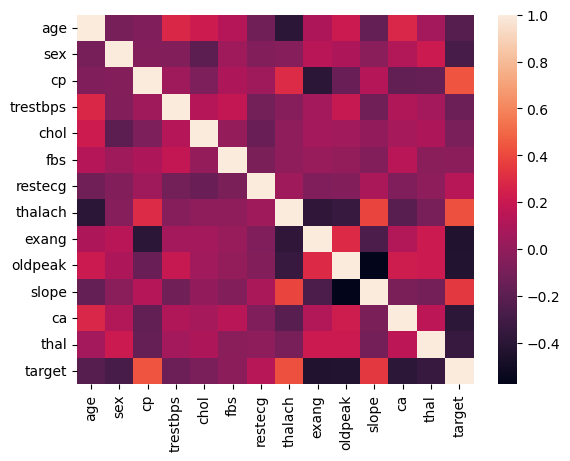

In [34]:
sns.heatmap(out.corr())

# ML

In [35]:
# log reg
x=out.drop('target',axis=1)
y=out['target']
print(y)
print(x)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64
          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()

In [40]:
model=lr.fit(x_train,y_train)

In [41]:
y_pred=model.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score,classification_report

In [43]:
print(confusion_matrix(y_test,y_pred))

[[30  5]
 [ 5 36]]


In [44]:
print(precision_score(y_test,y_pred))

0.8780487804878049


In [45]:
print(accuracy_score(y_test,y_pred))

0.868421052631579


In [46]:
print(recall_score(y_test,y_pred))

0.8780487804878049


In [47]:
print(f1_score(y_test,y_pred))

0.8780487804878049


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [49]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,0.290464,0.681005,0.032031,1.277972,-0.275659,-0.417635,-1.005832,0.627670,-0.696631,-0.896862,0.976352,0.265082,-0.512922
282,0.511041,0.681005,1.002577,-0.321189,-0.546216,2.394438,0.898962,-0.684245,-0.696631,1.001069,-0.649113,0.265082,-2.148873
197,1.393352,0.681005,-0.938515,-0.378302,0.149501,2.394438,0.898962,0.583939,-0.696631,-0.724323,-0.649113,1.244593,1.123029
158,0.400752,0.681005,0.032031,-0.378302,-0.507565,-0.417635,0.898962,-0.246940,-0.696631,-0.551783,-0.649113,3.203615,1.123029
164,-1.805024,0.681005,1.002577,0.364165,-1.377212,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,3.203615,-0.512922


In [50]:
y_train.head()

287    0
282    0
197    0
158    1
164    1
Name: target, dtype: int64

In [51]:
model.predict([[0.290464,	0.681005,	0.032031,	1.277972,	-0.275659,	-0.417635,	-1.005832,	0.627670,	-0.696631,	-0.896862,	0.976352,	0.265082,	-0.512922]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
model.predict([[0.511041,	0.681005,	1.002577,	-0.321189	,-0.546216,	2.394438,	0.898962,	-0.684245,	-0.696631,	1.001069,	-0.649113,	0.265082,	-2.148873]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [53]:
model.predict([[1.393352,	0.681005,	-0.938515	,-0.378302,	0.149501,	2.394438,	0.898962	,0.583939,	-0.696631,	-0.724323,	-0.649113,	1.244593,	1.123029]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [54]:
# ACCURACY OF LOG REG MODEL IS 87%%

# SVM

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [56]:
from sklearn.svm import SVC

In [57]:
svm_clf=SVC(kernel='rbf')
#kernel choosen is rbf(radial basis function),
#can also use linear,poly ,bt linear takes more time in
#building model

svm_model=svm_clf.fit(x_train,y_train)
#model creation

y_pred_svm=svm_model.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score,classification_report

In [59]:
print(confusion_matrix(y_test,y_pred_svm))

[[30  5]
 [ 4 37]]


In [60]:
print(precision_score(y_test,y_pred_svm))

0.8809523809523809


In [61]:
print(accuracy_score(y_test,y_pred_svm))

0.881578947368421


In [62]:
print(recall_score(y_test,y_pred_svm))

0.9024390243902439


In [63]:
print(f1_score(y_test,y_pred_svm))

0.8915662650602411


In [64]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [65]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,0.290464,0.681005,0.032031,1.277972,-0.275659,-0.417635,-1.005832,0.627670,-0.696631,-0.896862,0.976352,0.265082,-0.512922
282,0.511041,0.681005,1.002577,-0.321189,-0.546216,2.394438,0.898962,-0.684245,-0.696631,1.001069,-0.649113,0.265082,-2.148873
197,1.393352,0.681005,-0.938515,-0.378302,0.149501,2.394438,0.898962,0.583939,-0.696631,-0.724323,-0.649113,1.244593,1.123029
158,0.400752,0.681005,0.032031,-0.378302,-0.507565,-0.417635,0.898962,-0.246940,-0.696631,-0.551783,-0.649113,3.203615,1.123029
164,-1.805024,0.681005,1.002577,0.364165,-1.377212,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,3.203615,-0.512922


In [66]:
y_train.head()

287    0
282    0
197    0
158    1
164    1
Name: target, dtype: int64

In [67]:
svm_model.predict([[0.290464,	0.681005,	0.032031,	1.277972,	-0.275659,	-0.417635,	-1.005832,	0.627670,	-0.696631,	-0.896862,	0.976352,	0.265082,	-0.512922]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [68]:
svm_model.predict([[0.511041,	0.681005,	1.002577,	-0.321189,	-0.546216,	2.394438,	0.898962,	-0.684245,	-0.696631,	1.001069,	-0.649113,	0.265082	,-2.148873]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [69]:
svm_model.predict([[1.393352,	0.681005,	-0.938515,	-0.378302,	0.149501,	2.394438,	0.898962,	0.583939,	-0.696631,	-0.724323	,-0.649113,	1.244593,	1.123029]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# KNN

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.neighbors import KNeighborsClassifier


In [71]:
metric_k=[]

In [72]:
neighbors=np.arange(3,12)

In [73]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model_knn=knn.fit(x_train,y_train)
    y_pred_knn=model_knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [74]:
metric_k

[0.868421052631579,
 0.8421052631578947,
 0.8947368421052632,
 0.8947368421052632,
 0.9078947368421053,
 0.8552631578947368,
 0.868421052631579,
 0.8552631578947368,
 0.868421052631579]

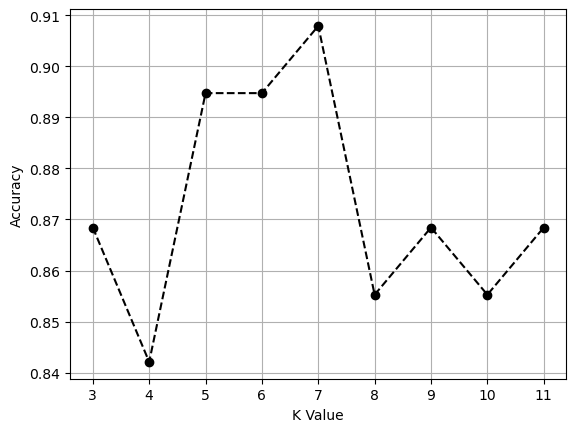

In [75]:
plt.plot(neighbors,metric_k,'o--',color='k')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [76]:
knn=KNeighborsClassifier(n_neighbors=7)
model_knn=knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [78]:
print(confusion_matrix(y_test,y_pred_knn))

[[31  4]
 [ 3 38]]


In [79]:
print(precision_score(y_test,y_pred_knn))

0.9047619047619048


In [80]:
print(recall_score(y_test,y_pred_knn))

0.926829268292683


In [81]:
print(f1_score(y_test,y_pred_knn))

0.9156626506024096


In [82]:
print(accuracy_score(y_test,y_pred_knn))

0.9078947368421053


In [83]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.90      0.93      0.92        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



# D T

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [85]:
print(y)
print(x)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64
          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 

In [86]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

          age       sex        cp  trestbps      chol       fbs   restecg  \
287  0.290464  0.681005  0.032031  1.277972 -0.275659 -0.417635 -1.005832   
282  0.511041  0.681005  1.002577 -0.321189 -0.546216  2.394438  0.898962   
197  1.393352  0.681005 -0.938515 -0.378302  0.149501  2.394438  0.898962   
158  0.400752  0.681005  0.032031 -0.378302 -0.507565 -0.417635  0.898962   
164 -1.805024  0.681005  1.002577  0.364165 -1.377212 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.481558  0.681005  1.002577  0.478391 -0.256334 -0.417635  0.898962   
71  -0.371269  0.681005  1.002577 -2.148802 -0.372287 -0.417635  0.898962   
106  1.613930  0.681005  1.973123  1.620649 -0.237008  2.394438 -1.005832   
270 -0.922713  0.681005 -0.938515 -0.663867  0.052874 -0.417635 -1.005832   
102  0.952197 -1.468418  0.032031  0.478391 -0.990702 -0.417635  0.898962   

      thalach     exang   oldpeak     slope        ca      thal  
287  0.62

In [87]:
from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor

In [88]:
dt_clf= DecisionTreeClassifier(random_state=42)

In [89]:
dt_model=dt_clf.fit(x_train,y_train)

In [90]:
y_pred_dt=dt_model.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score,classification_report

In [92]:
print(confusion_matrix(y_test,y_pred_dt))

[[28  7]
 [ 8 33]]


In [93]:
print(precision_score(y_test,y_pred_dt))

0.825


In [94]:
print(accuracy_score(y_test,y_pred_dt))

0.8026315789473685


In [95]:
print(recall_score(y_test,y_pred_dt))

0.8048780487804879


In [96]:
print(f1_score(y_test,y_pred_dt))

0.8148148148148149


In [97]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf_clf= RandomForestClassifier(random_state=42)
#random state has to be given  otherwise results changes everytime while executing

In [100]:
rf_model=rf_clf.fit(x_train,y_train)

In [101]:
rf_model=rf_clf.fit(x_train,y_train)

In [102]:
y_pred_rf=rf_model.predict(x_test)

In [103]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [104]:
print(confusion_matrix(y_test,y_pred_rf))

[[27  8]
 [ 5 36]]


In [105]:
print(precision_score(y_test,y_pred_rf))

0.8181818181818182


In [106]:
print(recall_score(y_test,y_pred_rf))

0.8780487804878049


In [107]:
print(f1_score(y_test,y_pred_rf))

0.8470588235294119


In [108]:
print(accuracy_score(y_test,y_pred_rf))

0.8289473684210527


In [109]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.82      0.88      0.85        41

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



In [110]:
# ACCURACY OF R F MODEL IS 83%%

# NAIVE BAYES

In [111]:
y=df['target']#target
x=df.drop('target',axis=1)#x contains features
print(y)
print(x)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       1

In [112]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [113]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

          age       sex        cp  trestbps      chol       fbs   restecg  \
287  0.290464  0.681005  0.032031  1.277972 -0.275659 -0.417635 -1.005832   
282  0.511041  0.681005  1.002577 -0.321189 -0.546216  2.394438  0.898962   
197  1.393352  0.681005 -0.938515 -0.378302  0.149501  2.394438  0.898962   
158  0.400752  0.681005  0.032031 -0.378302 -0.507565 -0.417635  0.898962   
164 -1.805024  0.681005  1.002577  0.364165 -1.377212 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.481558  0.681005  1.002577  0.478391 -0.256334 -0.417635  0.898962   
71  -0.371269  0.681005  1.002577 -2.148802 -0.372287 -0.417635  0.898962   
106  1.613930  0.681005  1.973123  1.620649 -0.237008  2.394438 -1.005832   
270 -0.922713  0.681005 -0.938515 -0.663867  0.052874 -0.417635 -1.005832   
102  0.952197 -1.468418  0.032031  0.478391 -0.990702 -0.417635  0.898962   

      thalach     exang   oldpeak     slope        ca      thal  
287  0.62

In [114]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(xtrain,ytrain)
predict1 = model1.predict(xtest)
predict1

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [115]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(xtrain,ytrain)
predict2 = model2.predict(xtest)
predict2

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [116]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(xtrain,ytrain)
predict3 = model3.predict(xtest)
predict3

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [117]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [118]:
#confusion_matrix
cm1=confusion_matrix(ytest,predict1)
cm2=confusion_matrix(ytest,predict2)
cm3=confusion_matrix(ytest,predict3)
print(cm1)
print(cm2)
print(cm3)

[[23 11]
 [ 6 36]]
[[20 14]
 [ 5 37]]
[[25  9]
 [ 5 37]]


In [119]:
#precision_score
ps1=precision_score(ytest,predict1)
ps2=precision_score(ytest,predict2)
ps3=precision_score(ytest,predict3)
print(ps1)
print(ps2)
print(ps3)

0.7659574468085106
0.7254901960784313
0.8043478260869565


In [120]:
#recall_score
rs1=recall_score(ytest,predict1)
rs2=recall_score(ytest,predict2)
rs3=recall_score(ytest,predict3)
print(rs1)
print(rs2)
print(rs3)

0.8571428571428571
0.8809523809523809
0.8809523809523809


In [121]:
#f1_score
f1_score1=f1_score(ytest,predict1)
f1_score2=f1_score(ytest,predict2)
f1_score3=f1_score(ytest,predict3)
print(f1_score1)
print(f1_score2)
print(f1_score3)

0.8089887640449439
0.7956989247311828
0.8409090909090908


In [122]:
#accuracy_score
acc_score1=accuracy_score(ytest,predict1)
acc_score2=accuracy_score(ytest,predict2)
acc_score3=accuracy_score(ytest,predict3)
print(acc_score1)
print(acc_score2)
print(acc_score3)

0.7763157894736842
0.75
0.8157894736842105


In [123]:
#classification_report
cls_rep1=classification_report(ytest,predict1)
cls_rep2=classification_report(ytest,predict2)
cls_rep3=classification_report(ytest,predict3)
print(cls_rep1)
print(cls_rep2)
print(cls_rep3)

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        34
           1       0.77      0.86      0.81        42

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76

              precision    recall  f1-score   support

           0       0.80      0.59      0.68        34
           1       0.73      0.88      0.80        42

    accuracy                           0.75        76
   macro avg       0.76      0.73      0.74        76
weighted avg       0.76      0.75      0.74        76

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        34
           1       0.80      0.88      0.84        42

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



# Performance Analysis

In [126]:
lg_score  =86 # Logistic Regression
svm_scodre=88 # support vector
knn_score =90 # K nearest
dt_score  =80 # decision tree
rf_score  =82 # random forest
nf_score  =82 # naive bayes

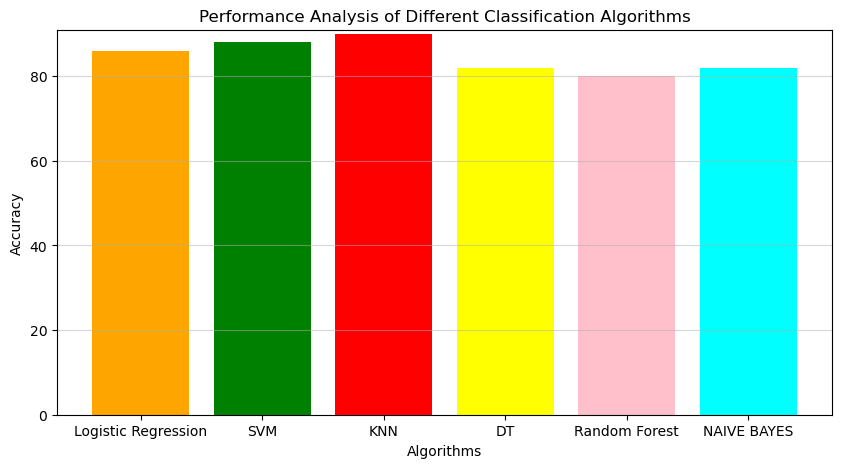

In [127]:
algorithms = ['Logistic Regression','SVM' ,'KNN','DT','Random Forest','NAIVE BAYES']
scores = [lg_score,svm_scodre,knn_score,rf_score,dt_score,nf_score]

# Plotting the bar graph 
plt.figure(figsize=(10, 5))
plt.bar(algorithms, scores, color=['orange', 'green', 'red', 'yellow', 'pink','cyan'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Performance Analysis of Different Classification Algorithms")
plt.ylim(0, max(scores) + 1) 
plt.grid(axis='y',alpha=0.5)
plt.show()

# Conclusion